In [3]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
def histogram_eq(im):
    im=im.convert('L')
    freq=[0]*256
    w, h=im.size
    for x in range(w):
        for y in range(h):
            freq[im.getpixel((x, y))]+=1

    cum_freq=freq
    for i in range(1, 256):
        cum_freq[i]+=cum_freq[i-1]
        
    pdf=np.array(freq)/(w*h)
    cdf=np.array(cum_freq)/(w*h)
    s=np.round(cdf*255)

    new_freq=[0]*256

    for i in range(256):
        new_freq[int(s[i])]+=freq[i]

    res=Image.new('L', size=im.size)
    for x in range(w):
        for y in range(h):
            res.putpixel((x, y), int(s[im.getpixel((x, y))]))
    return res

In [29]:
def adaptive_histogram_eq(im, out):
    im = im.convert('L')
    w, h = im.size
    res = Image.new('L', (w, h))
    N = 128

    for x in range(0, w, N):
        for y in range(0, h, N):
            block = Image.new('L', (N, N))
            for i in range(N):
                for j in range(N):
                    pixel_value = im.getpixel((x + i, y + j))
                    block.putpixel((i, j), pixel_value)
            
            block = histogram_eq(block)
            
            for i in range(N):
                for j in range(N):
                    res.putpixel((x + i, y + j), block.getpixel((i, j)))

    res.save(out)
    return res

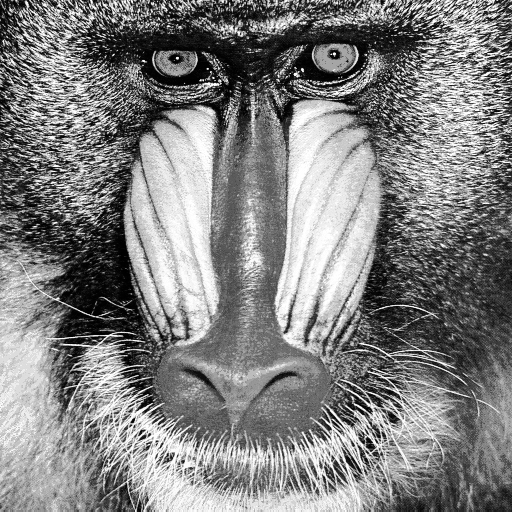

In [21]:
im=Image.open('mandril_color.tif')
im.convert('L').save('gray.png')
histogram_eq(im, "eq1.png")

im_gray=Image.open('gray.png')
histogram_eq(im_gray, "eq2.png")

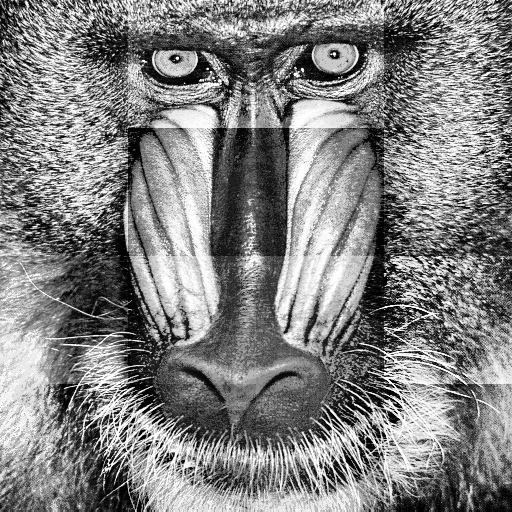

In [30]:
adaptive_histogram_eq(im, "adaptive_histogram_eq.png")